#Devin Augustin - 2440094352

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's import the data

In [3]:
df = pd.read_csv("/content/kyphosis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Let's check if there's any null/missing values in the dataset.

In [4]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

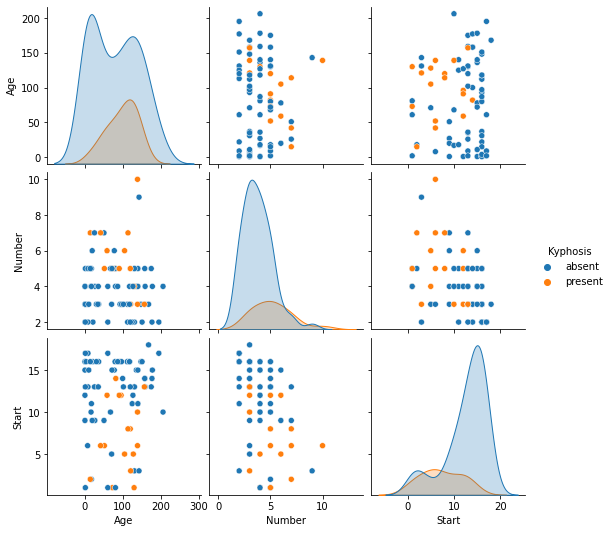

In [5]:
sns.pairplot(df, hue="Kyphosis")

Preparing the Data

We're going to split the x and the y where the x is going to have all the variables except 'Kyphosis' and y is only going to have 'Kyphosis'.

In [14]:
from sklearn.model_selection import train_test_split
x = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

Let's try training the data with Decision Tree and Grid Search

Here i'm going to have the max_leaf_nodes at 15

In [68]:
dtree=DecisionTreeClassifier(max_leaf_nodes=15)

In [69]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=15)

In [70]:
param_grid = {'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,10],
              'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2']
             }

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_leaf_nodes=15),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [71]:
grid_search.best_score_

0.7681818181818182

In [72]:
final = grid_search.best_estimator_
final

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       max_features='sqrt', max_leaf_nodes=15)

In [73]:
dtree_final = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='log2',
                       max_leaf_nodes=15)
dtree_final.fit(x_train, y_train)
y_predict = dtree_final.predict(x_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      absent       0.92      1.00      0.96        22
     present       1.00      0.33      0.50         3

    accuracy                           0.92        25
   macro avg       0.96      0.67      0.73        25
weighted avg       0.93      0.92      0.90        25



From the result, we have an accuracy of 92% from our model which is a good thing.

Visualizing the Decision Tree

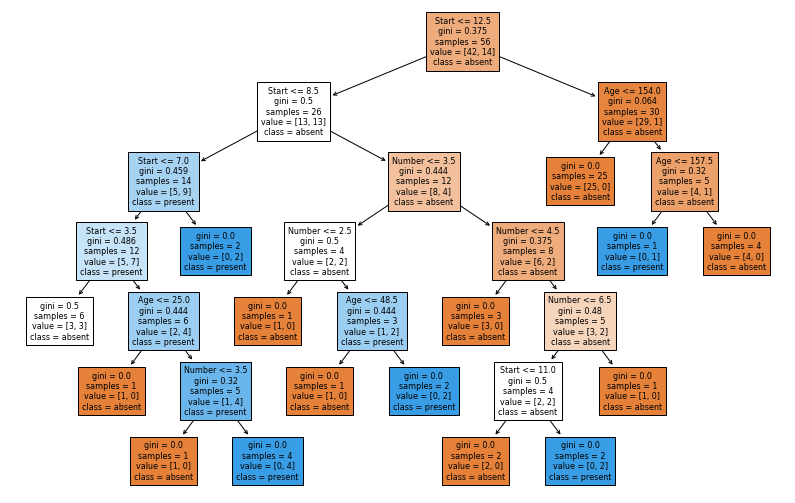

In [75]:
from sklearn import tree
features = list(df.columns[1:])
plt.figure(figsize=(14,9))
_ = tree.plot_tree(dtree_final,filled=True,feature_names=features,fontsize=8,class_names=['absent','present'])

And here is the visualization of decision tree from our model that we just made.